In [90]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [91]:
df=pd.read_csv(r"C:\Users\rajak\OneDrive\Documents\DATA\100-days-of-machine-learning\day36-imputing-numerical-data\titanic_toy.csv")

In [92]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [93]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [95]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [96]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [97]:
mean_Age=X_train['Age'].mean()
median_Age=X_train['Age'].median()

In [98]:
mean_Fare=X_train['Fare'].mean()
median_Fare=X_train['Fare'].median()

In [99]:
X_train['Age_mean']=X_train['Age'].fillna(mean_Age)
X_train['Age_median']=X_train['Age'].fillna(median_Age)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_Fare)
X_train['Fare_median']=X_train['Fare'].fillna(median_Fare)

In [100]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
637,31.0,26.2500,2,31.000000,31.0,26.2500,26.2500
614,35.0,8.0500,0,35.000000,35.0,8.0500,8.0500
394,24.0,16.7000,2,24.000000,24.0,16.7000,16.7000
444,NaN,8.1125,0,29.498846,28.0,8.1125,8.1125
436,21.0,34.3750,4,21.000000,21.0,34.3750,34.3750


In [101]:
print('orginal age var ',X_train['Age'].var())
print('imputer mean age var',X_train['Age_mean'].var())
print('imputed median age var',X_train['Age_median'].var())
print('original fare var',X_train['Fare'].var())
print('imputed mean fare var',X_train['Fare_mean'].var())
print('imputed median fare var',X_train['Fare_median'].var())

orginal age var  210.2517072477435
imputer mean age var 168.85193366872227
imputed median age var 169.20731007048155
original fare var 2761.0314349486343
imputed mean fare var 2621.232374951235
imputed median fare var 2637.012481677765


There is abrubt change variance in Age compare  to Fare 

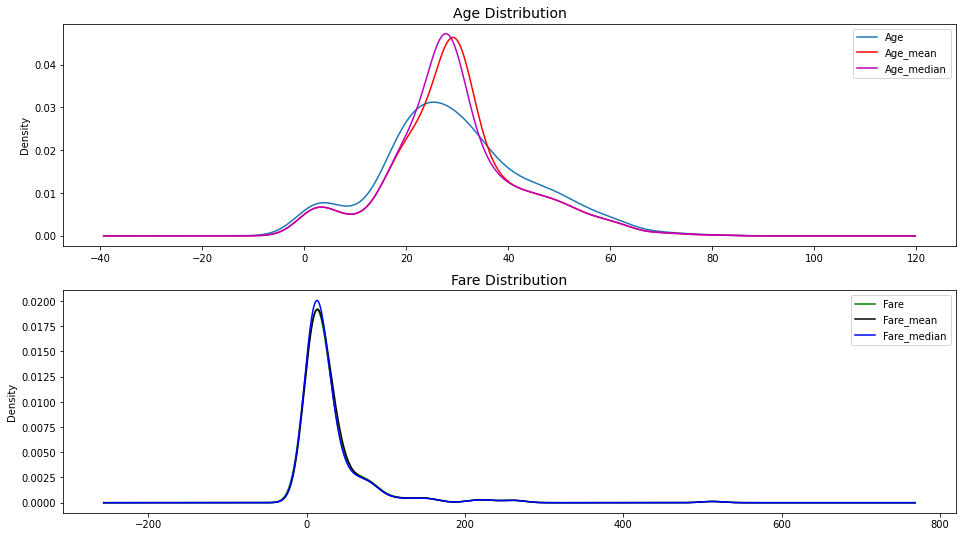

In [102]:
fig=plt.figure(figsize=(16,9))
ax=plt.subplot(211)
X_train['Age'].plot(kind='kde',ax=ax)
X_train['Age_mean'].plot(kind='kde',ax=ax,color='r')
X_train['Age_median'].plot(kind='kde',ax=ax,color='m')
plt.title('Age Distribution',fontsize=14)
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
ax2=plt.subplot(212)
X_train['Fare'].plot(kind='kde',ax=ax2,color='g')
X_train['Fare_mean'].plot(kind='kde',ax=ax2,color='k')
X_train['Fare_median'].plot(kind='kde',ax=ax2,color='b')
plt.title('Fare Distribution',fontsize=14)
lines,labels=ax2.get_legend_handles_labels()
ax2.legend(lines,labels,loc='best')

In [103]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [104]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<AxesSubplot:>

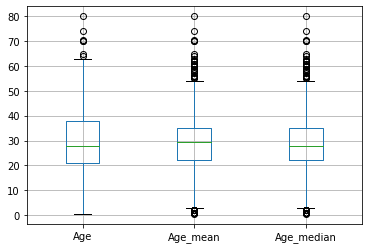

In [105]:
X_train[['Age','Age_mean','Age_median']].boxplot()

<AxesSubplot:>

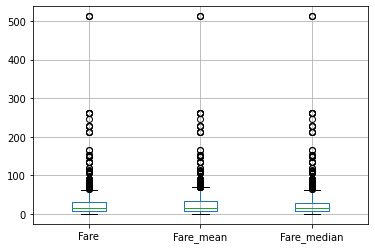

In [106]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

In the Age column there is abrubt change in outliers compare to fare distribution.

# Value impution using Scikitlearn

In [84]:
from sklearn.impute import SimpleImputer

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
impute1=SimpleImputer(strategy='mean')
impute2=SimpleImputer(strategy='median')

In [109]:
from sklearn.compose import ColumnTransformer

In [110]:
trf=ColumnTransformer(transformers=[
    ('Fare_trf',impute1,['Fare']),
    ('Age_trf',impute2,['Age'])
],remainder='passthrough')

In [111]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [113]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('Fare_trf', SimpleImputer(), ['Fare']),
                                ('Age_trf', SimpleImputer(strategy='median'),
                                 ['Age'])])

KeyError: 'imputer1'